<a href="https://colab.research.google.com/github/MrA-png/Digit-Recognition/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

score: 0.275
predictions: [0 0 0 6 6 6 6 0 6 1 1 1 1 6 1 1 6 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 6 6 6 6
 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 6 6 8 6 6 6 6 6 6 6 6
 6 6 6 6 6 6]
expected: 0     0
1     0
2     0
3     0
4     0
     ..
75    9
76    9
77    9
78    9
79    9
Name: Class, Length: 80, dtype: int64


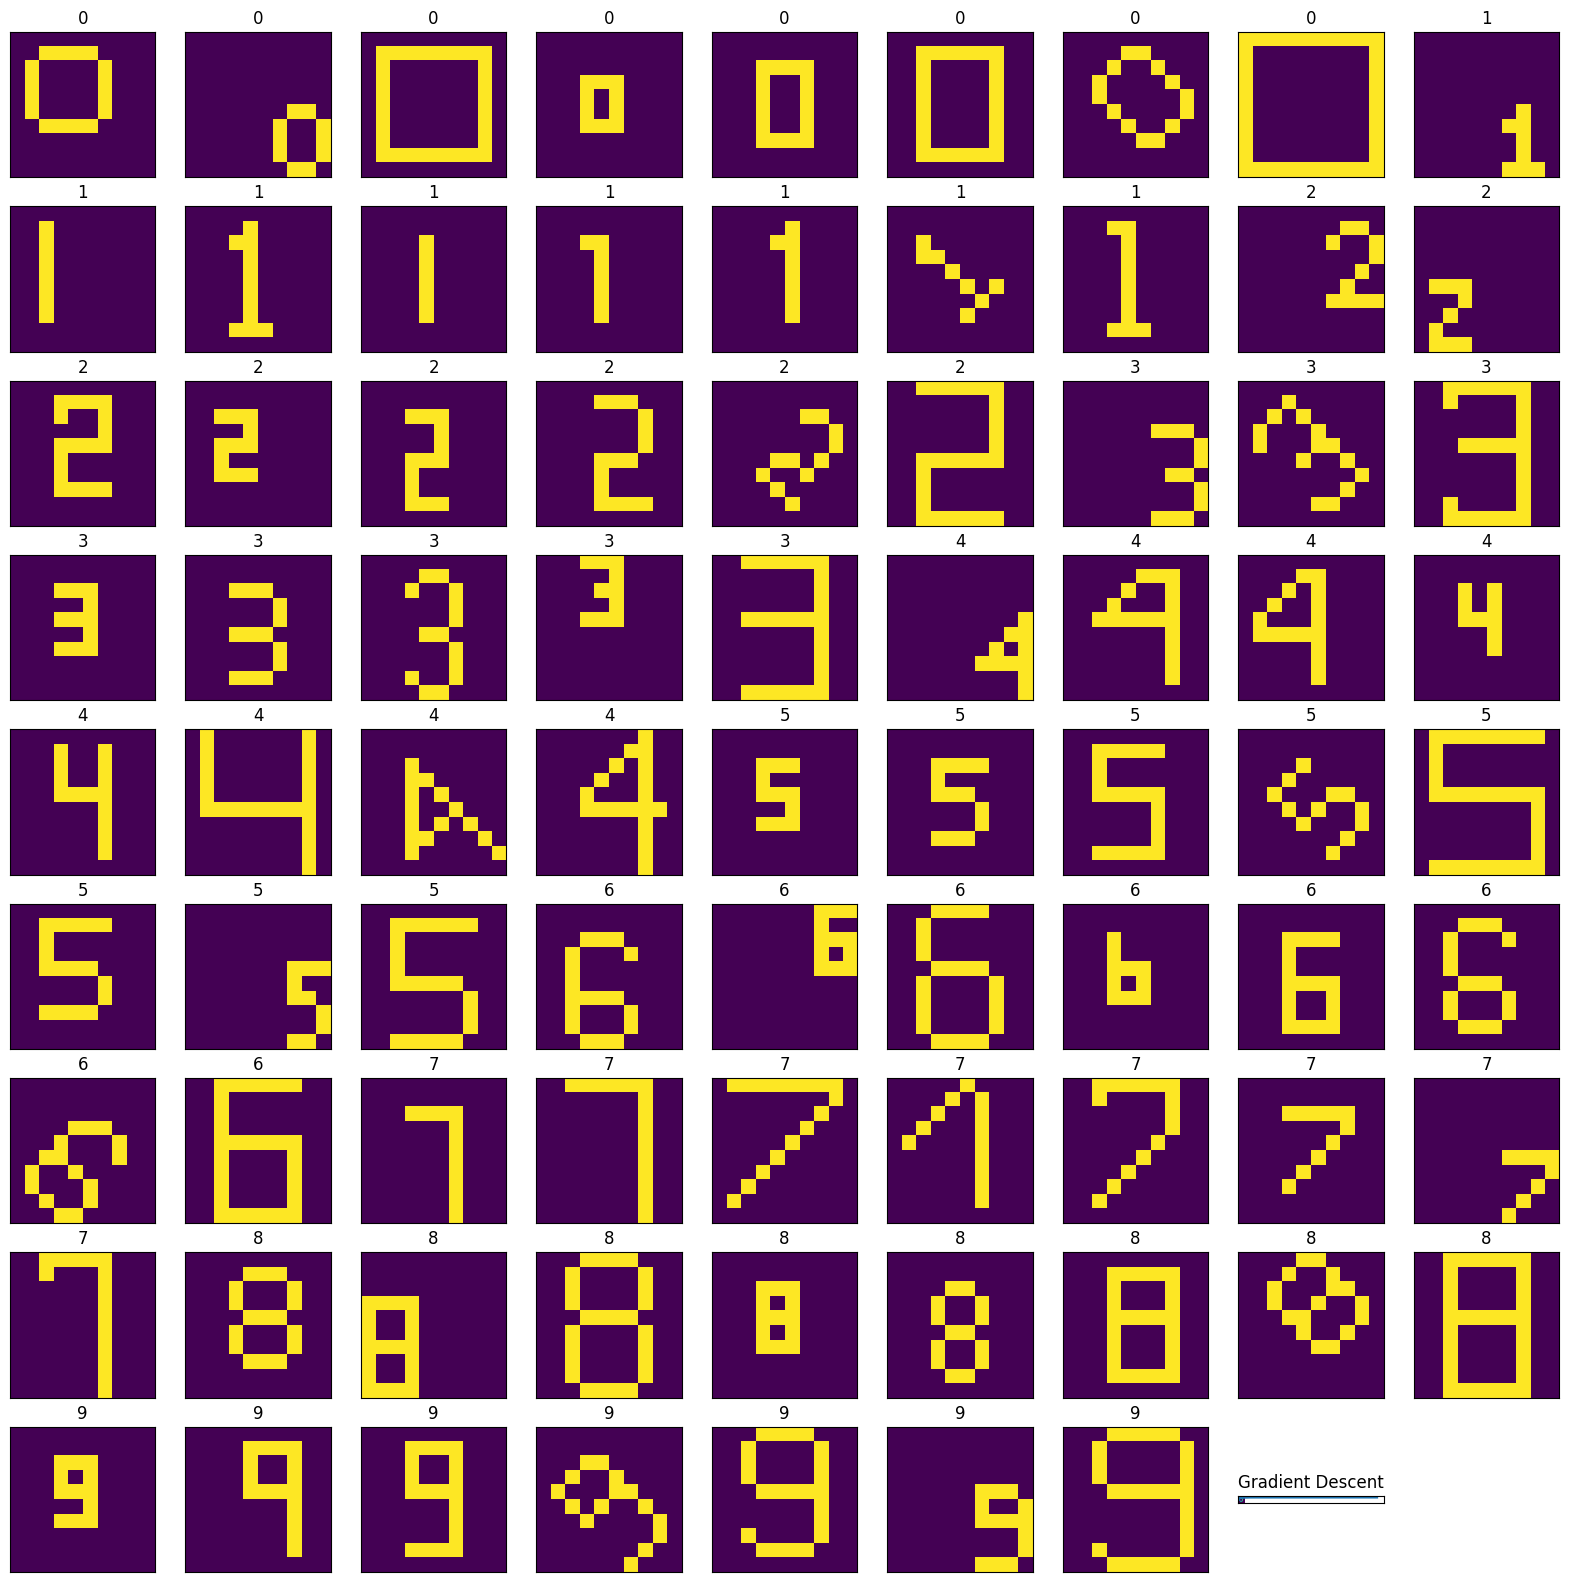

In [45]:
import math
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as MLP
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('digit.csv')
data = dataset.iloc[:,0:-1]
label = dataset.iloc[:,-1]

numbers_to_display = 80
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
  ax= plt.subplot(num_cells,num_cells ,i+1)
  im=ax.imshow(data.iloc[i].values.reshape(10,10))
  plt.xlabel=''
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  plt.title(label.iloc[i])

model = MLP(tol=0, hidden_layer_sizes=(10), activation =
'logistic', learning_rate_init=1)
model.fit(data,label)

print('score:', model.score(data,label))
print('predictions:', model.predict(data))
print('expected:',label)

plt=reload(plt)
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('Gradient Descent')
plt.show()

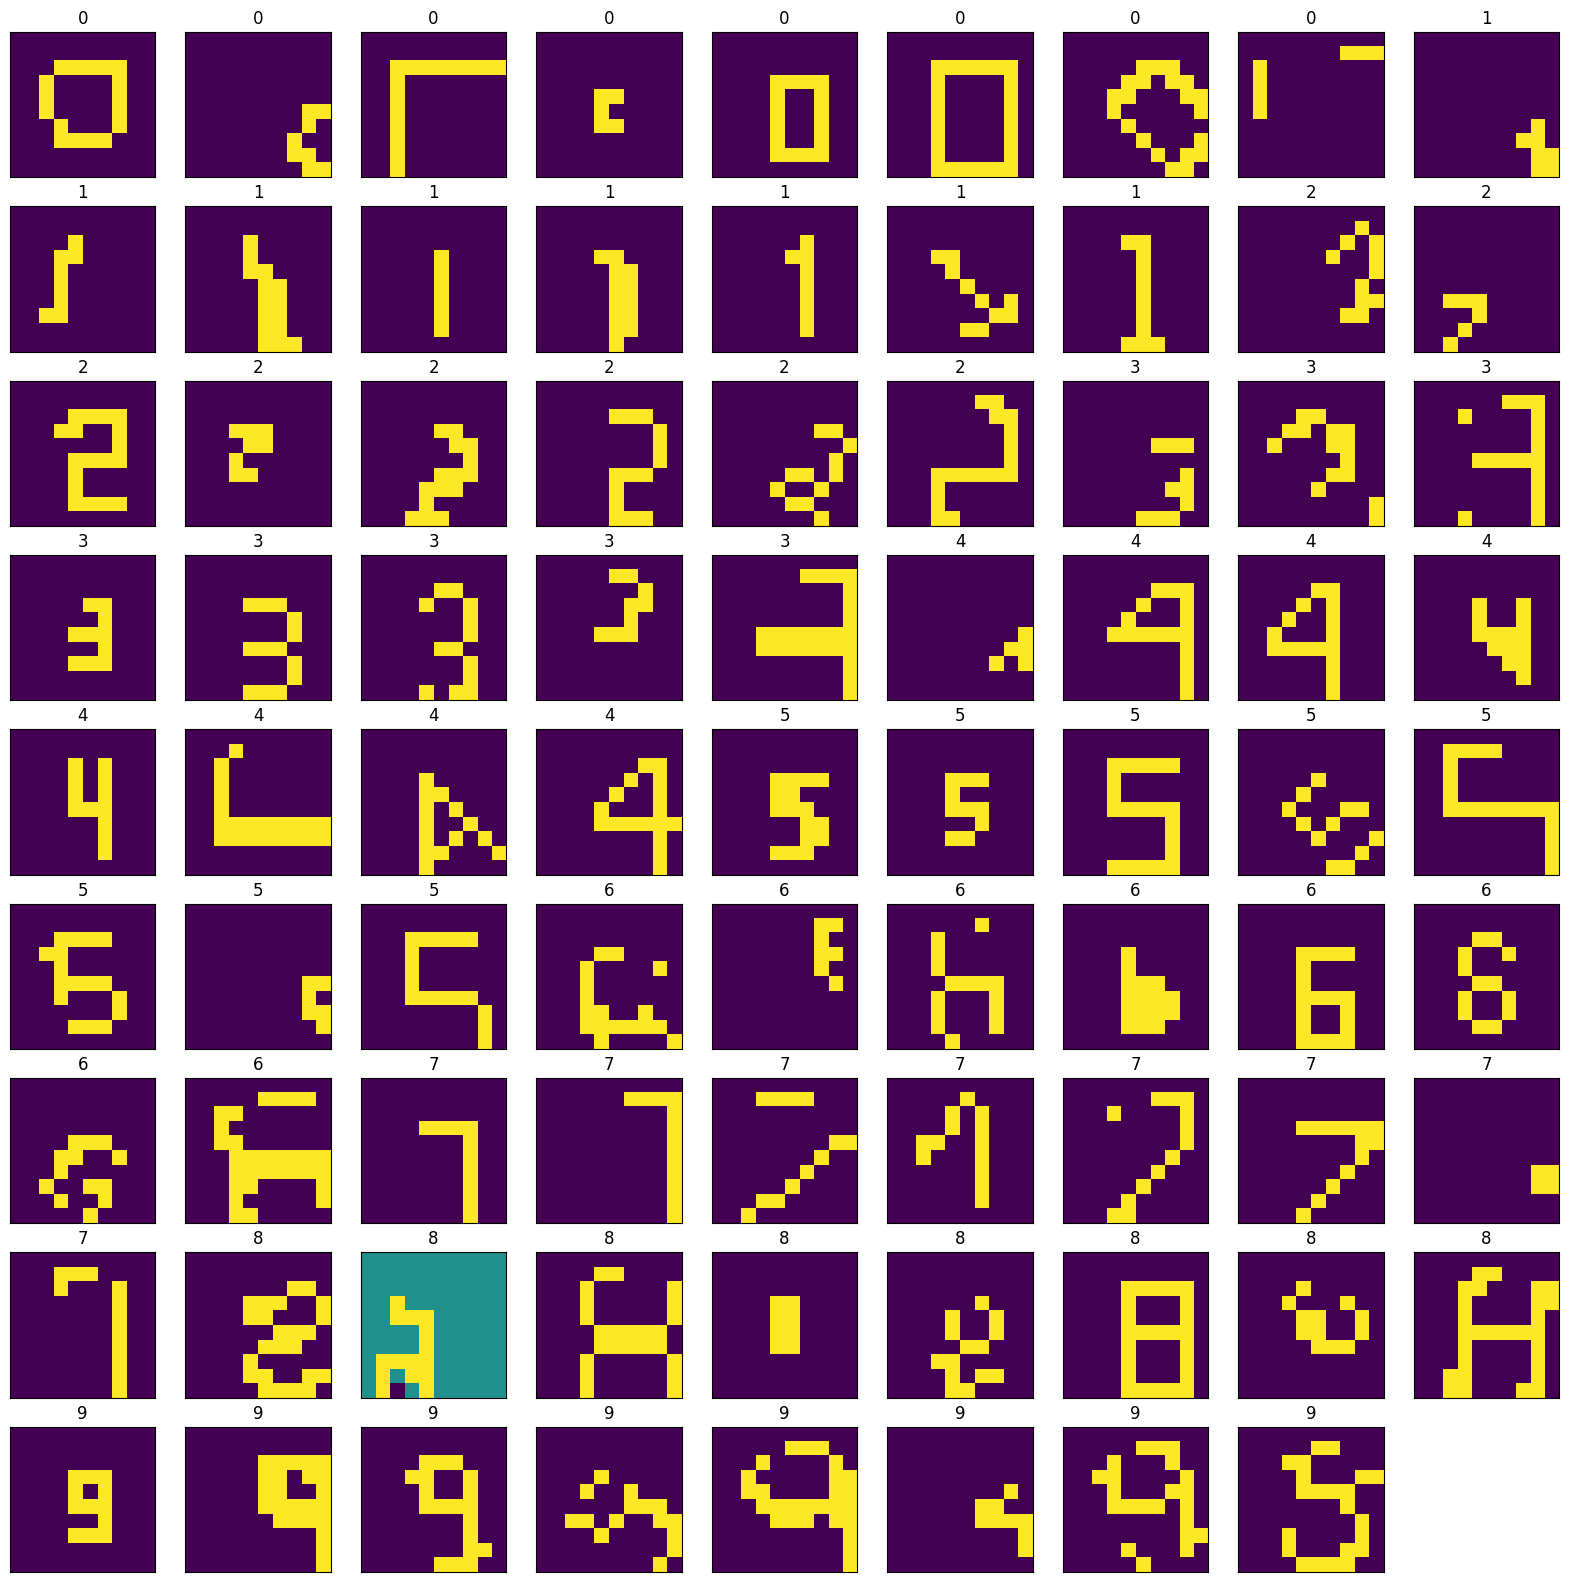

score: 0.1875
predictions: [8 8 0 8 8 8 8 0 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 5 8 8 8 8
 8 8 8 8 8 8 8 8 8 5 8 8 8 8 8 8 8 8 8 8 7 7 8 7 8 5 7 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8]
expected: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 9 9
 9 9 9 9 9 9]


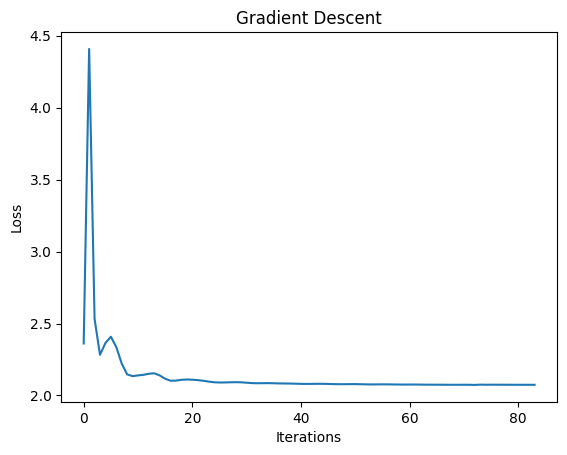

In [46]:
import math
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import numpy as np
from scipy.ndimage import rotate, zoom
import warnings
warnings.filterwarnings('ignore')

# Memuat dataset digit
dataset = pd.read_csv('digit.csv')
data = dataset.iloc[:, 0:-1]  # Fitur
label = dataset.iloc[:, -1]    # Label

# Fungsi untuk mentransformasi gambar (rotasi, skala, translasi)
def augment_data(X):
    augmented_data = []
    for i in range(len(X)):
        img = X.iloc[i].values.reshape(10, 10)  # Ubah vektor menjadi matriks 10x10

        # Rotasi gambar
        rotated_img = rotate(img, angle=np.random.uniform(-15, 15), reshape=False)

        # Skala gambar
        scaled_img = zoom(rotated_img, zoom=np.random.uniform(0.9, 1.1))

        # Translasi (posisi) dengan padding atau cropping
        padded_img = np.pad(scaled_img, ((1, 1), (1, 1)), 'constant', constant_values=0)[:10, :10]

        augmented_data.append(padded_img.flatten())  # Ubah kembali menjadi vektor

    return pd.DataFrame(augmented_data)

# Augmentasi dataset
data_augmented = augment_data(data)

# Menampilkan gambar hasil augmentasi (visualisasi berwarna)
numbers_to_display = min(80, len(data_augmented))  # Pastikan tidak melebihi jumlah gambar
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20, 20))

for i in range(numbers_to_display):
    ax = plt.subplot(num_cells, num_cells, i+1)

    # Menampilkan gambar yang sudah diaugmentasi
    im = ax.imshow(data_augmented.iloc[i].values.reshape(10, 10), cmap='viridis')  # Menggunakan cmap berwarna
    plt.xlabel = ''

    # Menyembunyikan sumbu X dan Y
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    # Menambahkan judul dengan label yang sesuai
    plt.title(label.iloc[i])

plt.show()

# Model MLP untuk klasifikasi digit
from sklearn.neural_network import MLPClassifier as MLP

# Melatih model MLP
model = MLP(tol=0, hidden_layer_sizes=(10), activation='logistic', learning_rate_init=1)
model.fit(data_augmented, label)

# Menampilkan skor dan prediksi dari model
print('score:', model.score(data_augmented, label))
print('predictions:', model.predict(data_augmented))
print('expected:', label.values)

# Menampilkan curve Gradient Descent
plt = reload(plt)
plt.plot(model.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent')
plt.show()


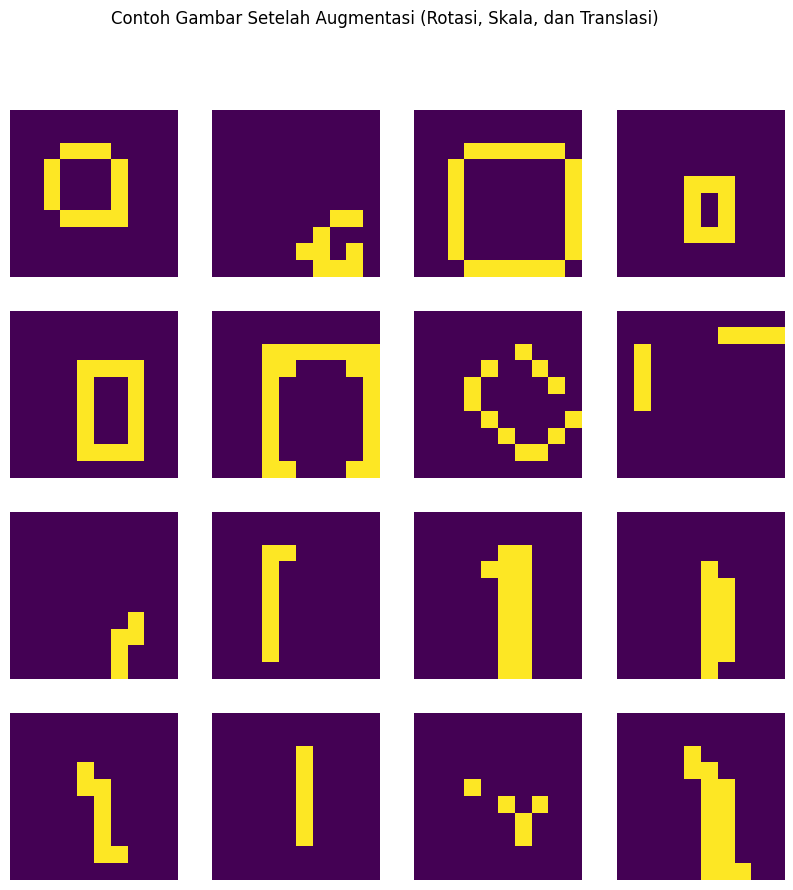

In [47]:
import pandas as pd
import numpy as np
from scipy.ndimage import rotate, zoom
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Memuat dataset
data = pd.read_csv('digit.csv')
X = data.iloc[:, 0:-1]  # Fitur
y = data.iloc[:, -1]   # Label

# Fungsi untuk mentransformasi gambar (contoh: rotasi, skala, translasi)
def augment_data(X):
    augmented_data = []
    for i in range(len(X)):
        img = X.iloc[i].values.reshape(10, 10)  # Ubah vektor menjadi matriks 10x10

        # Rotasi gambar
        rotated_img = rotate(img, angle=np.random.uniform(-15, 15), reshape=False)

        # Skala gambar
        scaled_img = zoom(rotated_img, zoom=np.random.uniform(0.9, 1.1))

        # Translasi (posisi) dengan padding atau cropping
        padded_img = np.pad(scaled_img, ((1, 1), (1, 1)), 'constant', constant_values=0)[:10, :10]

        augmented_data.append(padded_img.flatten())

    return pd.DataFrame(augmented_data)

# Membuat dataset yang sudah ditransformasi
X_augmented = augment_data(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y, test_size=0.2, random_state=42)

# Tampilkan beberapa contoh gambar hasil augmentasi
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_augmented.iloc[i].values.reshape(10, 10))
    plt.axis('off')
plt.suptitle('Contoh Gambar Setelah Augmentasi (Rotasi, Skala, dan Translasi)')
plt.show()


In [48]:
# Fungsi pembantu untuk melatih model MLP dengan parameter yang diberikan
def train_mlp(X_train, y_train, X_test, y_test, layers, learning_rate):
    model = MLPClassifier(hidden_layer_sizes=(layers,), learning_rate_init=learning_rate, max_iter=500)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)

    # Menampilkan akurasi
    print(f'Layer: {layers}, Learning Rate: {learning_rate}, Akurasi: {accuracy:.2f}')

    return model, accuracy

# Eksperimen dengan ukuran layer yang berbeda dan learning rate yang tetap
layer_sizes = [3, 5, 10, 15, 20, 25]
learning_rate = 0.1
for layer in layer_sizes:
    model, accuracy = train_mlp(X_train, y_train, X_test, y_test, layer, learning_rate)


Layer: 3, Learning Rate: 0.1, Akurasi: 0.25
Layer: 5, Learning Rate: 0.1, Akurasi: 0.19
Layer: 10, Learning Rate: 0.1, Akurasi: 0.31
Layer: 15, Learning Rate: 0.1, Akurasi: 0.38
Layer: 20, Learning Rate: 0.1, Akurasi: 0.44
Layer: 25, Learning Rate: 0.1, Akurasi: 0.38


In [49]:
# Eksperimen dengan layer ukuran 10 dan berbagai learning rate
learning_rates = [0.1, 0.5, 3, 5, 8, 10]
layer_size = 10
for lr in learning_rates:
    model, accuracy = train_mlp(X_train, y_train, X_test, y_test, layer_size, lr)


Layer: 10, Learning Rate: 0.1, Akurasi: 0.25
Layer: 10, Learning Rate: 0.5, Akurasi: 0.00
Layer: 10, Learning Rate: 3, Akurasi: 0.12
Layer: 10, Learning Rate: 5, Akurasi: 0.00
Layer: 10, Learning Rate: 8, Akurasi: 0.00
Layer: 10, Learning Rate: 10, Akurasi: 0.06


Layer: 10, Learning Rate: 0.1, Akurasi: 0.31
Layer: 10, Learning Rate: 0.5, Akurasi: 0.12
Layer: 10, Learning Rate: 3, Akurasi: 0.00
Layer: 10, Learning Rate: 5, Akurasi: 0.12
Layer: 10, Learning Rate: 8, Akurasi: 0.06
Layer: 10, Learning Rate: 10, Akurasi: 0.00


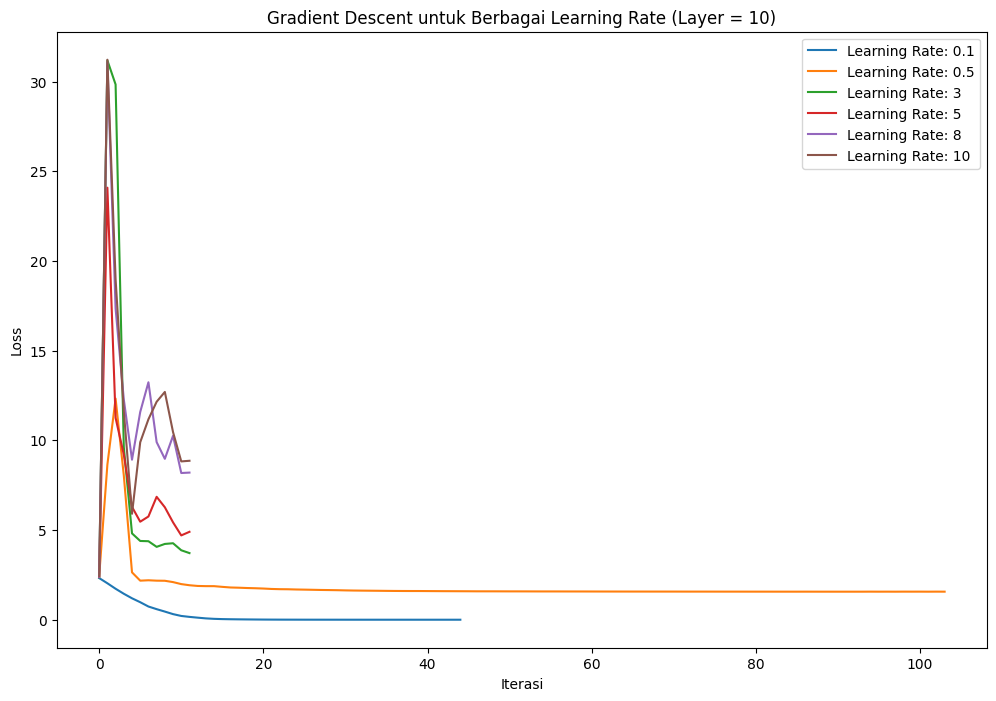

In [50]:
# Visualisasi Gradient Descent untuk setiap percobaan learning rate
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    model, _ = train_mlp(X_train, y_train, X_test, y_test, layer_size, lr)

    # Menampilkan loss curve dari model untuk setiap learning rate
    plt.plot(model.loss_curve_, label=f'Learning Rate: {lr}')

plt.xlabel('Iterasi')
plt.ylabel('Loss')
plt.title('Gradient Descent untuk Berbagai Learning Rate (Layer = 10)')
plt.legend()
plt.show()


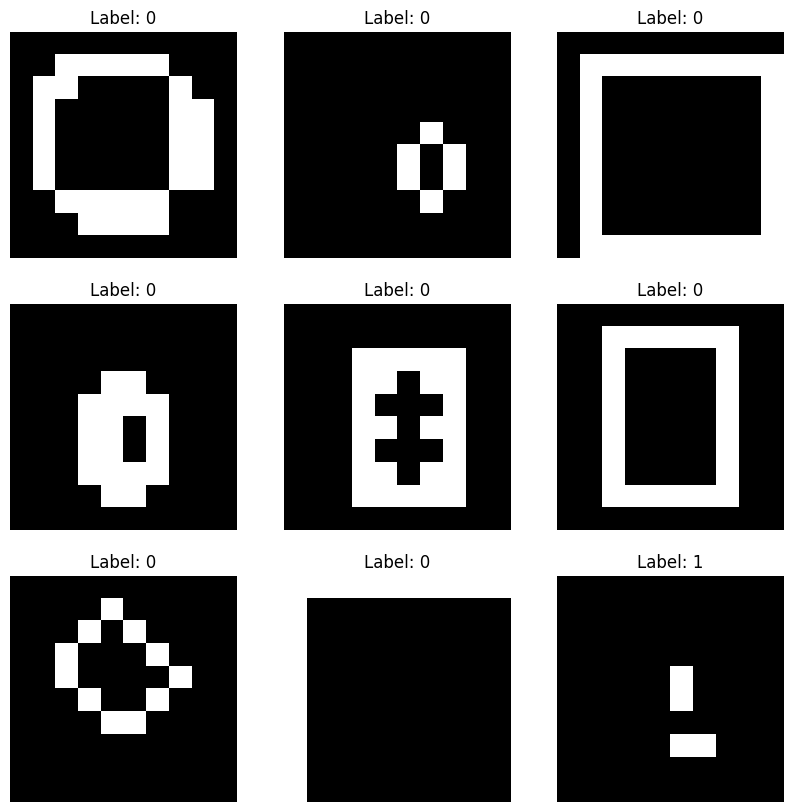

In [51]:
import pandas as pd
import numpy as np
from scipy.ndimage import rotate, shift, zoom
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('digit.csv')
data = dataset.iloc[:, 0:-1]
label = dataset.iloc[:, -1]

# Function to augment data by shifting (position), rotating, and scaling
def augment_data(data):
    augmented_data = []

    for i in range(len(data)):
        # Reshape to 10x10 image
        img = data.iloc[i].values.reshape(10, 10)

        # Shift (Position augmentation)
        shifted = shift(img, shift=(np.random.uniform(-1, 1), np.random.uniform(-1, 1)))

        # Rotate (Rotation augmentation)
        rotated = rotate(img, angle=np.random.uniform(-30, 30), reshape=False)

        # Scale (Scaling augmentation) - Ensure output remains 10x10
        scaled = zoom(img, zoom=np.random.uniform(0.8, 1.2))
        if scaled.shape[0] < 10:  # If image is smaller than 10x10 after zoom, pad it
            pad_width = 10 - scaled.shape[0]
            scaled = np.pad(scaled, ((0, pad_width), (0, pad_width)), mode='constant', constant_values=0)
        else:  # If image is larger, crop it
            scaled = scaled[:10, :10]

        augmented_data.append(scaled.flatten())  # Flatten back to 1D

    return np.array(augmented_data)

# Augment data
augmented_data = augment_data(data)

# Display the first 9 augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_data[i].reshape(10, 10), cmap='gray')
    plt.title(f"Label: {label.iloc[i]}")
    plt.axis("off")
plt.show()
